<a href="https://colab.research.google.com/github/1rubenito/data_science/blob/main/An%C3%A1lise_de_Dados_Airbnb_Floren%C3%A7a_It%C3%A1lia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb | *Florença - Itália*

*por* `Rubens Gianfaldoni`

<img src='https://i2.wp.com/blog.keycafe.com/wp-content/uploads/2019/07/Screenshot-2019-09-30-at-1.38.40-PM.png?fit=1250%2C9999&ssl=1'>

A cidade de *Florença* na **Itália** é conhecida por diversos pontos turísticos importantes no país. Em uma viagem pela Toscana a cidade de *Florença* é essencial pelos museus, passeios a pé e locais únicos. 

Alguns distritos da cidade são pontos importantes como o de *Gavinana e Galluzzo*, mais ao sudeste da cidade, rico em áreas verdes em torno de aldeias, famoso por ser um local procurado pelo belíssimo passeio a pé por vilas muito bonitas e por ter muitos assentamentos religiosos antigos. O *Distrito 3*, como também é conhecido, também hospedou os últimos anos de vida de `Galileo Galilei`.

O Centro Histórico de *Florença* é a atração principal da cidade, onde os melhores pontos turísticos estão localizados. Ao contrário de *Gavinana e Galluzzo*, o Centro Histórico é uma região de alta demanda, muita gente e pequena, o que facilita o acesso a quase tudo, visto que a cidade toda pode ser percorrida a pé em 30 minutos, normalmente. Também famosa pelos museus famosos que contém obras importantes de `Leonardo da Vinci`, `Raffaello`, `Michelangelo` e outros.




**Neste *notebook*, iremos analisar os dados referentes à cidade de  *Florença*, e ver quais insights podem ser extraídos a partir de dados brutos.**

*fonte:* https://bit.ly/2YtwGq8 |||
         https://bit.ly/3t6Nfq2 |||
         https://bit.ly/3r64ENI 
         
<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>
         

## Obtenção dos Dados


O `dataset` que vamos utilizar nesta análise foi retirado do site [Inside Airbnb](https://bit.ly/3mX6Mqw).

Vamos iniciar importando as bibliotecas necessárias e fazer a leitura dos dados.

In [177]:
# importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [218]:
!pip install wordcloud -q

In [178]:
#criar uma variável para o dataset
df = pd.read_csv("http://data.insideairbnb.com/italy/toscana/florence/2020-12-21/visualisations/listings.csv")

In [179]:
# mostrar as 7 primeiras entradas
df.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78210,11.24392,Entire home/apt,70,2,1,2019-09-27,0.07,4,0
1,24470,Fortezza/City Centre Modern Apt 2+1,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,70,2,3,2019-04-21,0.02,4,365
2,24471,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,135,2,0,NaN,NaN,4,365
3,24472,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78202,11.24399,Entire home/apt,120,2,2,2012-04-11,0.02,4,1
4,31840,A Residenza Martin Classic room,380378,Officina 360,NaN,Centro Storico,43.77709,11.25216,Private room,35,1,119,2020-10-09,0.93,27,111
5,32120,Welcome at Corte Verde in Florence,99235,Lucia,NaN,Gavinana Galluzzo,43.76352,11.27726,Entire home/apt,75,1,15,2019-04-28,0.12,1,89
6,32180,Charming Gem - Oltrarno City centre,13925330,Cesare,NaN,Centro Storico,43.76964,11.24360,Entire home/apt,89,3,20,2020-03-31,0.16,2,363


Vou traduzir as variáveis para melhor entendimento.



*   *id* - identificação do imóvel
*   *name* - descrição do imóvel
*   *host_id* - identificação do anfitrião do imóvel
*   *host_name* - nome do anfitrião do imóvel
*   *neighbourhood* - bairro do imóvel
*   *latitude* - coordenada geográfica do imóvel
*   *longitude* - coordenada geográfica do imóvel
*   *room_type* - tipo do imóvel
*   *price* - preço da diária imóvel
*   *minimum_nights* - mínimo de noites do imóvel
*   *number_of_reviews* -  número de avaliações do imóvel
*   *last_review* - data da úlima avaliação do imóvel
*   *reviews_per_month* - número de avaliações por mês do imóvel
*   *calculated_host_listings_count* - quantidade de imóveis do mesmo anfitrião
*   *availability_365* - disponibilidade do imóvel




In [180]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar o tipo de dado do DataFrame
display(df.dtypes)

Entradas:	 11632
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [181]:
# exibir mais detalhes do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11632 entries, 0 to 11631
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11632 non-null  int64  
 1   name                            11630 non-null  object 
 2   host_id                         11632 non-null  int64  
 3   host_name                       11617 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11632 non-null  object 
 6   latitude                        11632 non-null  float64
 7   longitude                       11632 non-null  float64
 8   room_type                       11632 non-null  object 
 9   price                           11632 non-null  int64  
 10  minimum_nights                  11632 non-null  int64  
 11  number_of_reviews               11632 non-null  int64  
 12  last_review                     

In [182]:
# exibir dados ausentes do dataset 
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               11632
reviews_per_month                  2287
last_review                        2287
host_name                            15
name                                  2
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
id                                    0
dtype: int64

In [183]:
# exibir as variáveis por seus valores ausentes em porcentagem
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.196613
last_review                       0.196613
host_name                         0.001290
name                              0.000172
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Após descobrir a quantidade de valores ausentes no `dataset`, podemos concluir:


*   a variável `neighbourhood_group` tem 100% de dados ausentes, podemos removê-la do `dataset`;
*   a variável `reviews_per_month` representa *19%* dos dados ausentes, e como se trata de uma variável do tipo *INT* , vamos preencher com a mediana os valores ausentes;
* a variável `last_review` representa *19%* de dados ausentes, porém como não vamos utilizar, deixaremos nessa situação.



In [184]:
# criar novo dataset 
df_clean = df.copy()

In [185]:
# remover variável 100% nula
df_clean.drop(columns=['neighbourhood_group'], inplace=True)

In [186]:
# preencher variável com a mediana
rpm_median = df_clean.reviews_per_month.median()
df_clean = df_clean.fillna({"reviews_per_month" : rpm_median})

Podemos ainda remover os dados nulos das variáveis  que sobraram, `host_name` e `name`, pois representam *1%* e *0,01%* respectivamente.

In [187]:
df_clean.dropna(axis=0, inplace=True)

df_clean.isnull().sum().sort_values(ascending=False)

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
last_review                       0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

In [188]:
# exibir antes e depois do dataset 
print("Antes: {}".format(df.shape))
print("Depois: {}".format(df_clean.shape))

Antes: (11632, 16)
Depois: (9334, 15)


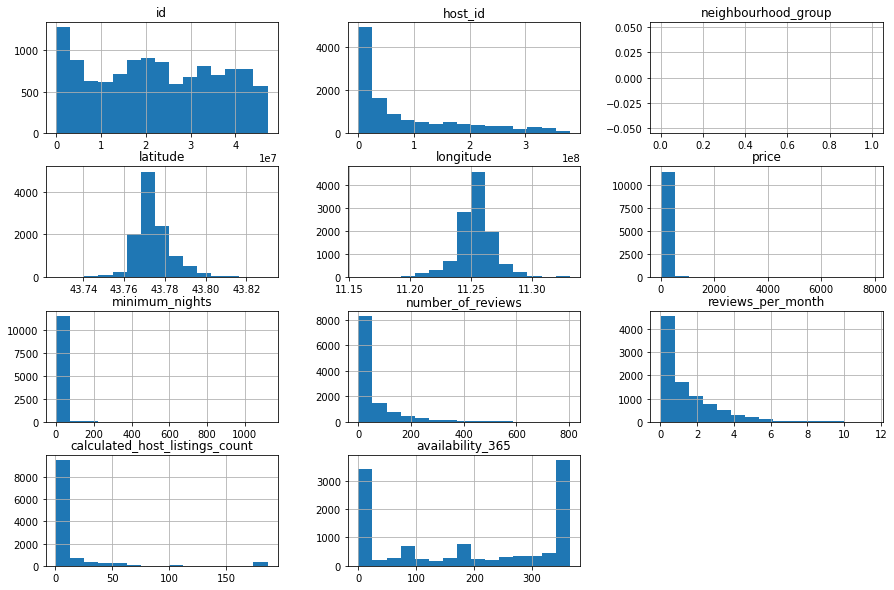

In [189]:
# plotar o histograma variável df
df.hist(bins=15, figsize=(15,10));

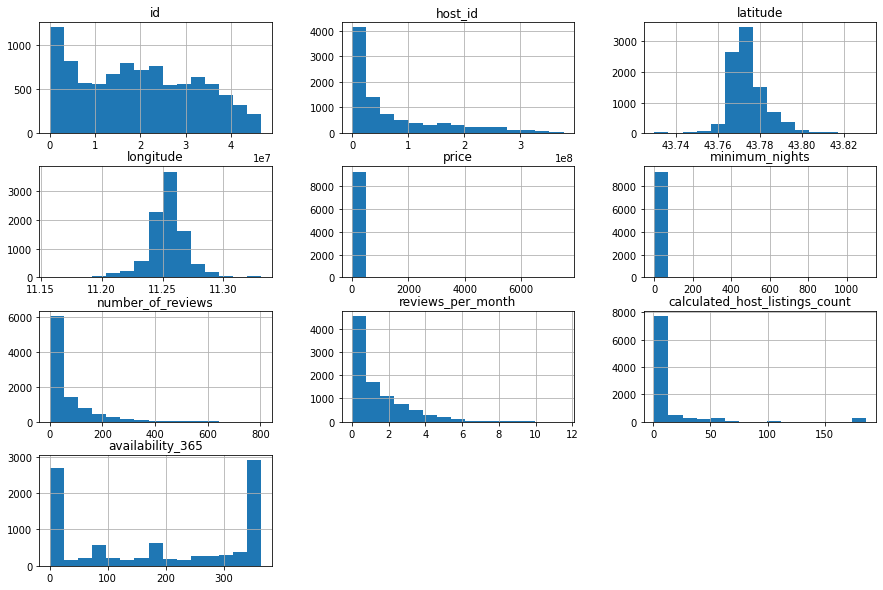

In [190]:
# plot variável histograma variável df_clean
df_clean.hist(bins=15, figsize=(15,10));

Ao visualizar os gráficos podemos notar que:

* após a remoção dos valores ausentes alguns gráficos fazem mais sentido, porém precisam de tratamento na remoção dos *outliers*, que são os valores que estão muito acima ou abaixo da média. Por isso acontece o que exibe o histograma da coluna `price` por exemplo;
*   colunas `price` - `minimum_nights` - `calculated_host_listings_count`, possuem *outliers*.




#Análise dos Dados

Com o `dataset` tratado agora podemos dar seguimento para análise separando algumas variáveis que vamos usar.

In [198]:
# resumo estatístico de price, minimum_nights, calculated_host_listings_count, availability_365
df_clean[['price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,calculated_host_listings_count,availability_365
count,9334.000000,9334.000000,9334.000000,9334.000000
mean,101.720591,3.419541,12.597064,187.348725
std,169.337659,21.575031,31.215127,150.476133
min,9.000000,1.000000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,1.000000
50%,75.000000,2.000000,2.000000,180.000000
75%,110.000000,2.000000,7.000000,355.000000
max,7500.000000,1100.000000,186.000000,365.000000


Partimos agora para remoção de outliers das variáveis, para isso usaremos a fórmula dos quartis para descobrir quais os valores limites, fora dos outliers.

In [220]:
# descobrir outliers de price
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
iqr_price = q3_price - q1_price
print('IQR de price: ', iqr_price)

mais_price = q3_price + 1.5 * iqr_price
menos_price = q1_price - 1.5 * iqr_price

print('limite price: ', mais_price)
print('menor valor de price: ', menos_price)

IQR de price:  60.0
limite price:  200.0
menor valor de price:  -40.0


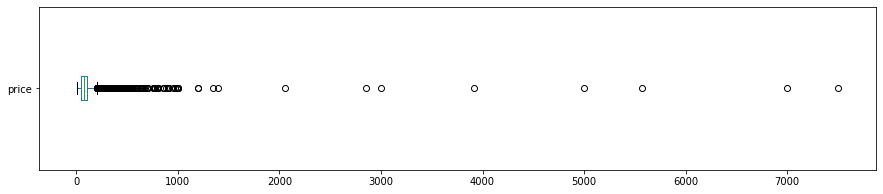

679 linhas acima de $200
7.27% do dataset 


In [224]:
# boxplot de price 
df_clean.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a média da coluna price
print("{} linhas acima de $200".format(len(df_clean[df_clean['price'] > 200])))
print("{:.2f}% do dataset ".format((len(df_clean[df_clean['price'] > 200]) / df_clean.shape[0]) * 100))

In [225]:
#  descobrir outliers de minimum_nights
q1_noites = df_clean.minimum_nights.quantile(.25)
q3_noites= df_clean.minimum_nights.quantile(.75)
iqr_noites = q3_noites - q1_noites
print('IQR de minimum_nights: ', iqr_noites)

mais_noites = q3_noites + 1.5 * iqr_noites
menos_noites = q1_noites - 1.5 * iqr_noites

print('limite minimum_nights: ', mais_noites)
print('menor valor de minimum_nights: ', menos_noites)

IQR de minimum_nights:  1.0
limite minimum_nights:  3.5
menor valor de minimum_nights:  -0.5


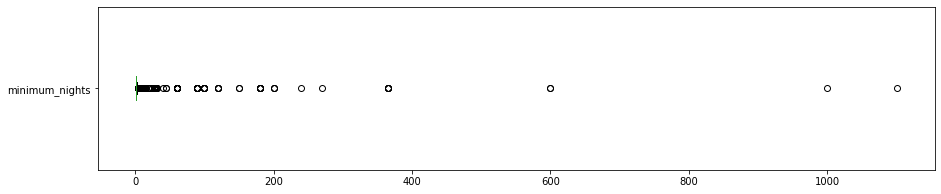

703 linhas acima de 3.5
7.53% do dataset 


In [226]:
# boxplot de minimum_nights
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a média da coluna minimum_nights
print("{} linhas acima de 3.5".format(len(df_clean[df_clean['minimum_nights'] > 3.5])))
print("{:.2f}% do dataset ".format((len(df_clean[df_clean['minimum_nights'] > 3.5]) / df_clean.shape[0]) * 100))

In [227]:
# outliers de calculated_host_listings_count
q1_chlc = df_clean.calculated_host_listings_count.quantile(.25)
q3_chlc= df_clean.calculated_host_listings_count.quantile(.75)
iqr_chlc = q3_chlc - q1_chlc
print('IQR de calculated_host_listings_count: ', iqr_chlc)

mais_chlc = q3_chlc + 1.5 * iqr_chlc
menos_chlc = q1_chlc - 1.5 * iqr_chlc

print('limite CHLC: ', mais_chlc)
print('menor valor de CHLC: ', menos_chlc)

IQR de calculated_host_listings_count:  6.0
limite CHLC:  16.0
menor valor de CHLC:  -8.0


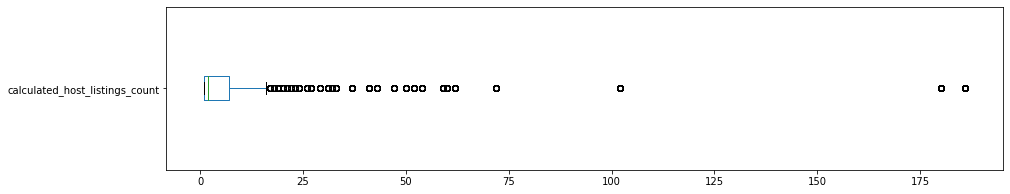

1404 linhas acima de 16
15.0% do dataset 


In [228]:
# boxplot de variavel calculated_host_listings_count
df_clean.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a média da coluna calculated_host_listings_count
print("{} linhas acima de 16".format(len(df_clean[df_clean['calculated_host_listings_count'] > 16])))
print("{:.1f}% do dataset ".format((len(df_clean[df_clean['calculated_host_listings_count'] > 16]) / df_clean.shape[0]) * 100))

A presença de *outliers* é bem marcante nas variáveis exibidas acima, por isso iremos tratar para melhor análise futura.

Para a coluna `price` iremos remover todo valor acima de 200.

Para a coluna `minimum_nights` iremos remover valores acima de 3.5.

Para a coluna `calculated_host_listings_count` iremos remover valores acima de 16.

In [229]:
# remover outliers da coluna price
df_clean.drop(df_clean[df_clean["price"] > 200].index, axis=0, inplace=True)

In [230]:
# remover outliers da coluna minimum_nights
df_clean.drop(df_clean[df_clean["minimum_nights"] > 3.5].index, axis=0, inplace=True)

In [231]:
# remover outliers da coluna calculated_host_listings_count
df_clean.drop(df_clean[df_clean["calculated_host_listings_count"] > 16].index, axis=0, inplace=True)

In [232]:
# resumo estatístico após remoção de outliers
df_clean[['price', 'minimum_nights', 'calculated_host_listings_count']].describe()

,price,minimum_nights,calculated_host_listings_count
count,6849.000000,6849.000000,6849.000000
mean,75.897357,1.837933,3.127464
std,38.369801,0.712877,3.140772
min,9.000000,1.000000,1.000000
25%,49.000000,1.000000,1.000000
50%,69.000000,2.000000,2.000000
75%,95.000000,2.000000,4.000000
max,200.000000,3.000000,16.000000


Podemos verificar abaixo que após o tratamento de outliers, o histograma exibe gráficos com melhor visualização dos dados.

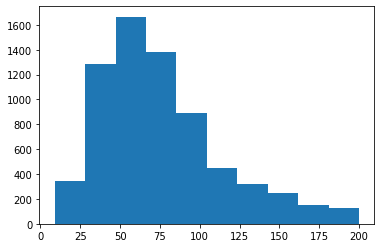

In [233]:
# histograma da variável price, sem outliers
df_clean['price'].hist(grid=False);

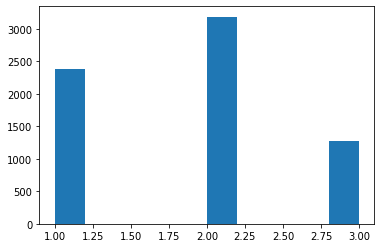

In [237]:
# histograma da variável minimum_nights, sem outliers
df_clean['minimum_nights'].hist(grid=False);

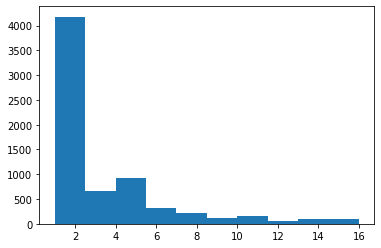

In [236]:
# histograma da variável calculated_host_listings_count, sem outliers
df_clean['calculated_host_listings_count'].hist(grid=False);

Vamos iniciar uma análise pelos imóveis de Florença disponíveis no `Airbnb`.


No `dataset` do `Airbnb`, a empresa exibe os seguintes tipos de imóveis disponíveis:


*   *Entire home/apt* = apartamentos completos ou casas
*   *Private room* = um quarto do imóvel
*   *Hotel Room* = quartos de hotéis
*   *Shared Room* = quartos compartilhados


In [238]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5103
Private room       1579
Hotel room          147
Shared room          20
Name: room_type, dtype: int64

In [239]:
# exibir quantidade de imóveis por bairro
df_clean.neighbourhood.value_counts()

Centro Storico       4787
Campo di Marte        764
Rifredi               661
Isolotto Legnaia      376
Gavinana Galluzzo     261
Name: neighbourhood, dtype: int64

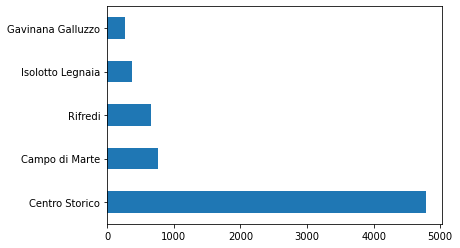

In [240]:
# plot de imóveis por bairro
df_clean.neighbourhood.value_counts().plot(kind='barh');

In [241]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.438704
Private room       0.135746
Hotel room         0.012638
Shared room        0.001719
Name: room_type, dtype: float64

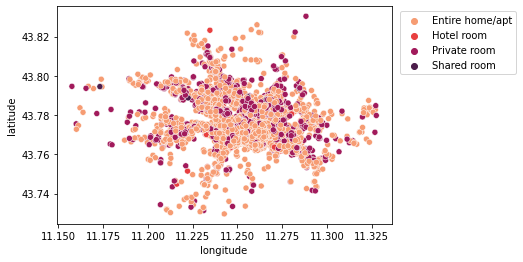

In [242]:
# plot da localização dos imóveis
sns.scatterplot(y="latitude", x="longitude", hue="room_type", data=df_clean,alpha= (1), palette='rocket_r');

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.5);

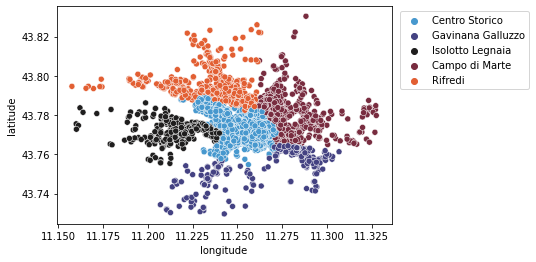

In [243]:
# plot da localização dos bairros
sns.scatterplot(y="latitude", x="longitude", hue="neighbourhood", data=df_clean, alpha= (1), palette='icefire');

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0.5);

Com a predominância de apartamentos completos para locação, vamos verificar quantos imóveis completos existem para alugar em cada bairro.


In [244]:
# exibindo imóveis completos no Centro Storico
df_clean.loc[(df_clean['neighbourhood'] == 'Centro Storico') & (df_clean['room_type'] == 'Entire home/apt')].reset_index(drop=True)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,Centro Storico,43.78210,11.24392,Entire home/apt,70,2,1,2019-09-27,0.07,4,0
1,24470,Fortezza/City Centre Modern Apt 2+1,99178,Benedetta And Lorenzo,Centro Storico,43.78202,11.24399,Entire home/apt,70,2,3,2019-04-21,0.02,4,365
2,24472,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,Centro Storico,43.78202,11.24399,Entire home/apt,120,2,2,2012-04-11,0.02,4,1
3,32180,Charming Gem - Oltrarno City centre,13925330,Cesare,Centro Storico,43.76964,11.24360,Entire home/apt,89,3,20,2020-03-31,0.16,2,363
4,39821,STUDIO P.zza del CARMINE1 S.Spirito,154769,Matilde,Centro Storico,43.76853,11.24395,Entire home/apt,50,3,33,2017-06-25,0.31,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,45693360,Una gemma in Santa Reparata nel CENTRO di Firenze,130533985,Eleonora,Centro Storico,43.77987,11.25733,Entire home/apt,119,2,1,2020-10-27,0.53,3,0
3812,45982889,Little Apartment San Niccolò,12684759,Simone,Centro Storico,43.76469,11.25995,Entire home/apt,25,2,1,2020-11-19,0.88,2,0
3813,46059111,SANTO SPIRITO - Elegant apartment in the center,213086146,Elisabetta,Centro Storico,43.76678,11.24804,Entire home/apt,40,2,1,2020-12-11,1.00,2,152
3814,46076815,"★★★★★Heart of Florence ""Santa Maria Novella""",2025150,Stefano,Centro Storico,43.77753,11.25060,Entire home/apt,69,1,3,2020-12-07,1.88,4,161


In [245]:
# exibindo imóveis completos no Campo di Marte
df_clean.loc[(df_clean['neighbourhood'] == 'Campo di Marte') & (df_clean['room_type'] == 'Entire home/apt')].reset_index(drop=True)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,66045,ARTISTI bright and comfortable apartment,323151,Mauro,Campo di Marte,43.78296,11.26874,Entire home/apt,62,3,96,2018-04-30,0.79,4,355
1,90557,Magic Florence,490856,David,Campo di Marte,43.77017,11.27639,Entire home/apt,48,1,46,2019-11-07,0.57,1,0
2,224669,CORTE D'ARNOLFO AMBRA APARTMENT,1169561,Silverio,Campo di Marte,43.76801,11.27248,Entire home/apt,65,2,22,2020-01-03,0.74,3,193
3,255154,Serena's Charming 2 Bedroom Apt,1340797,Bitte,Campo di Marte,43.77007,11.28095,Entire home/apt,85,2,180,2019-07-30,1.96,2,322
4,271153,Cozy Florence studio with WIFI,264805,Luca And Friends,Campo di Marte,43.78251,11.32289,Entire home/apt,29,2,262,2020-10-04,2.40,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,44690914,Colazione e cena sui tetti... in Firenze...,362300248,Mattia,Campo di Marte,43.78483,11.28271,Entire home/apt,35,2,4,2020-11-30,1.38,1,205
454,45150906,Donatello Warm Apartment - 200Mt from Walking ...,307628721,Memories,Campo di Marte,43.77799,11.27118,Entire home/apt,39,2,4,2020-12-01,1.29,2,166
455,45151597,Florence Apartment - 200mt from City Center,307628721,Memories,Campo di Marte,43.77689,11.27101,Entire home/apt,27,2,6,2020-11-28,1.88,2,178
456,45445548,DONATELLO - Elegant and spacious apartment,213086146,Elisabetta,Campo di Marte,43.77750,11.27155,Entire home/apt,62,2,7,2020-12-14,2.31,2,220


In [247]:
# exibindo imóveis completos no Rifredi
df_clean.loc[(df_clean['neighbourhood'] == 'Rifredi') & (df_clean['room_type'] == 'Entire home/apt')].reset_index(drop=True)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,201931,"LOVELY,GARDEN,3MINS TO CENTER VIATRAMVIA",988127,Sara,Rifredi,43.78400,11.25147,Entire home/apt,70,1,45,2020-01-05,0.43,1,1
1,405278,La Casina Country House in a Typical Tuscan Ga...,643110,Isabella,Rifredi,43.79713,11.25299,Entire home/apt,103,1,3,2019-06-17,0.04,6,364
2,451353,"Spacious, 2 bedroom flat near city center",2241893,Monia,Rifredi,43.78897,11.24623,Entire home/apt,38,2,354,2020-07-25,3.38,1,33
3,457193,In Florence as the Florentines ...,1549248,Marcella,Rifredi,43.78589,11.26003,Entire home/apt,79,2,31,2020-01-01,0.33,3,364
4,475973,"When in Florence, do as ...",2358649,Francesca E Bruno,Rifredi,43.80501,11.23859,Entire home/apt,75,2,140,2020-01-24,1.34,3,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,44653054,Appartamento vista Duomo,361507323,Daniele,Rifredi,43.79002,11.25079,Entire home/apt,80,2,1,2020-08-23,0.25,1,0
396,45168754,appartamento in corte privata,40276553,Giancarlo,Rifredi,43.80042,11.20139,Entire home/apt,29,1,1,2020-09-04,0.27,2,235
397,45650873,Tiffany House Careggi,24494760,Alessandro,Rifredi,43.80709,11.23806,Entire home/apt,42,1,2,2020-12-08,1.28,1,180
398,45663855,Casa ad un passo da Firenze centro,369944957,Beatrice,Rifredi,43.81640,11.23009,Entire home/apt,30,1,3,2020-11-23,1.34,1,50


In [248]:
# exibindo imóveis completos no Isolotto Legnaia
df_clean.loc[(df_clean['neighbourhood'] == 'Isolotto Legnaia') & (df_clean['room_type'] == 'Entire home/apt')].reset_index(drop=True)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,45606,MATTEO Apart. Florence Centre,202686,Tarcisio,Isolotto Legnaia,43.77280,11.23746,Entire home/apt,50,2,403,2020-01-09,3.49,3,365
1,73739,Your apartment in the Heart of City,385786,Dante,Isolotto Legnaia,43.76988,11.23978,Entire home/apt,59,3,34,2020-01-03,0.29,1,339
2,124134,Florence Flat Great Quality/Price,616226,Christina,Isolotto Legnaia,43.77451,11.23184,Entire home/apt,65,3,200,2020-01-20,2.52,2,50
3,338683,The Hayloft at “ La Federiga”,1720289,Isabella,Isolotto Legnaia,43.77102,11.21135,Entire home/apt,60,3,19,2019-11-03,0.21,1,355
4,591218,ISOLOTTO'S HOUSE,2917596,Daniele,Isolotto Legnaia,43.77646,11.21006,Entire home/apt,48,2,23,2020-01-01,0.23,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,44488746,Family Apartment con 3 camere e open space,357813181,Marco,Isolotto Legnaia,43.78044,11.20325,Entire home/apt,70,2,2,2020-09-10,0.53,1,0
253,44585466,LOFT Ver Florencia,47473899,Cristina,Isolotto Legnaia,43.77442,11.23248,Entire home/apt,77,2,7,2020-12-19,2.41,2,351
254,45200842,Casa Resy,133365331,Simona,Isolotto Legnaia,43.76738,11.21229,Entire home/apt,80,1,3,2020-12-14,1.11,1,351
255,45267731,Appartamento tranquillo vicino al centro,329706582,Sergio,Isolotto Legnaia,43.77293,11.22710,Entire home/apt,35,1,2,2020-10-11,0.72,1,180


In [249]:
# exibindo imóveis completos no Gavinana Galluzzo
df_clean.loc[(df_clean['neighbourhood'] == 'Gavinana Galluzzo') & (df_clean['room_type'] == 'Entire home/apt')].reset_index(drop=True)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,32120,Welcome at Corte Verde in Florence,99235,Lucia,Gavinana Galluzzo,43.76352,11.27726,Entire home/apt,75,1,15,2019-04-28,0.12,1,89
1,128907,Il Podesta Apartment in Florence,636702,Massimiliano Lepri,Gavinana Galluzzo,43.74913,11.23474,Entire home/apt,40,1,178,2020-01-03,1.56,1,335
2,261285,"loft CONTIRENT centrale, A/C wifi",1369058,Lorenzo,Gavinana Galluzzo,43.76246,11.28169,Entire home/apt,17,3,282,2020-11-08,2.72,12,324
3,510697,"Firenze, Casa con Giardino e Parcheggio Privato",2516607,Cosimo,Gavinana Galluzzo,43.73836,11.23236,Entire home/apt,98,1,19,2018-10-07,0.20,1,355
4,522612,"Firenze ""La casa dell'Ortensia""",313909,Giammarco,Gavinana Galluzzo,43.76126,11.28565,Entire home/apt,60,3,6,2017-06-16,0.09,1,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,44423372,Appartamento Manuela,263646005,Manuela,Gavinana Galluzzo,43.75357,11.23942,Entire home/apt,60,2,1,2020-09-15,0.30,3,0
168,44523551,⭐️Il Podestà Bianco ⭐️ Parcheggio Gratis 4 min,222360782,Lorenzo,Gavinana Galluzzo,43.74763,11.23336,Entire home/apt,90,2,1,2020-08-18,0.24,2,270
169,44663358,Appartamento Firenze,296259168,Stella,Gavinana Galluzzo,43.75647,11.29012,Entire home/apt,50,1,1,2020-08-16,0.23,1,0
170,44698003,A POCHI METRI USCITA AUTOSTRADA FIRENZE SUD,2703692,Riccardo,Gavinana Galluzzo,43.74616,11.29323,Entire home/apt,110,1,1,2020-08-22,0.24,6,114


Para imóveis completos, acima pudemos analisar que grande parte está localizada na região do *Centro Storico* com `3816  ` opções. 

Na cidade de Florença, qual será a localidade mais cara para uma locação?

Vamos buscar a média de preços na cidade e depois exibir a localidade mais cara na cidade, de acordo com o `dataset`.

In [250]:
# exibir preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Centro Storico       81.949446
Gavinana Galluzzo    72.321839
Isolotto Legnaia     64.023936
Campo di Marte       61.451571
Rifredi              56.930408
Name: price, dtype: float64

In [252]:
#  médio do preço de todos os bairros
preco_total_bairro = df_clean.price.mean()
print('Média de preço de todo os bairros: {:.2f}'.format(preco_total_bairro))

Média de preço de todo os bairros: 75.90


A diária dos imóveis para alugar em Florença tem em média valor de $*75.90*.

In [253]:
# localização mais cara da cidade
df_clean.sort_values(['price', 'neighbourhood'], ascending=False)[:1]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3173,11674553,VILLA LE PERGOLE - XVCentury - 15 minutes Firenze,61991904,Anna Eleonora,Rifredi,43.8081,11.25769,Entire home/apt,200,2,104,2020-10-18,1.86,1,316


In [254]:
# localização mais barata da cidade
df_clean.sort_values(['price', 'neighbourhood'])[:1]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9000,35368028,Naked life share with us in Florence\nfree bike,13688948,Andrea,Campo di Marte,43.7935,11.28458,Shared room,9,2,3,2019-12-19,0.2,1,179


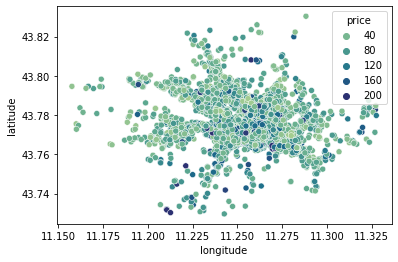

In [255]:
# plot de price sobre mapa de Florença
sns.scatterplot(y="latitude", x="longitude", hue="price", data=df_clean,alpha= (1), palette='crest');

In [256]:
# ver a média de noites de hospedagem
print("Média de noites de hospedagem em Florença: {:.1f} dias".format(df_clean['minimum_nights'].mean()))

Média de noites de hospedagem em Florença: 1.8 dias


Analisando os anfitriões dos imóveis de Florença, podemos perceber que grande parte está com os mesmos donos.

In [257]:
# total de imóveis para cada anfitrião
df_clean.host_name.value_counts()[:11]

Lorenzo       140
Francesca     107
Francesco     103
Andrea        101
Alessandro     98
Marco          93
Chiara         81
Silvia         70
Stefano        68
Paolo          65
Alessandra     63
Name: host_name, dtype: int64

Para exibir de forma mais didática, vamos plotar uma WordCloud.


[WordCloud](https://amueller.github.io/word_cloud/#) é uma biblioteca para exibir em formato de painel de palavras, quais as palavras que aparecem mais em um `dataset`.

Vamos configurar a variável `host_name` para exibir neste painel.

In [258]:
# descobrindo se há valores ausentes para serem tratados
print("Valores ausentes para host_name:", df_clean.host_name.isnull().sum())

host_name = df.dropna(subset=["host_name"], axis=0)["host_name"]

Valores ausentes para host_name: 0


In [259]:
# juntando todas as palavras
td_palavras = ' '.join(s for s in host_name)

print("Quantidade de Palavras: {}".format(len(td_palavras)))

Quantidade de Palavras: 114600


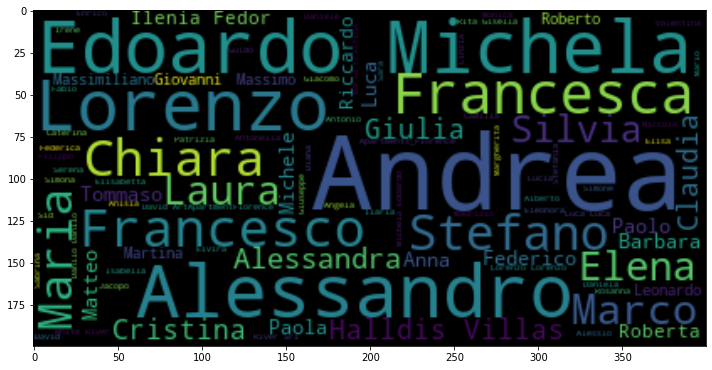

In [260]:
# stopwords
stopwords = set(STOPWORDS)
stopwords.update(['apartments', 'apartment', 'florence']) # nessa variável, incluímos todas as palavras que não fazem sentido aparecer no painel

# gerar wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(td_palavras)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation="bilinear")

plt.tight_layout()

O painel deixa bem explícito quais os anfitriões com maior número de imóveis. Quanto maior o tamanho do nome, maior representação no `dataset`.

Vamos criar correlações entre as variáveis que usamos.

In [261]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,calculated_host_listings_count,availability_365
price,1.000000,0.121412,0.179923,0.116369
minimum_nights,0.121412,1.000000,-0.056645,0.010267
calculated_host_listings_count,0.179923,-0.056645,1.000000,0.112481
availability_365,0.116369,0.010267,0.112481,1.000000


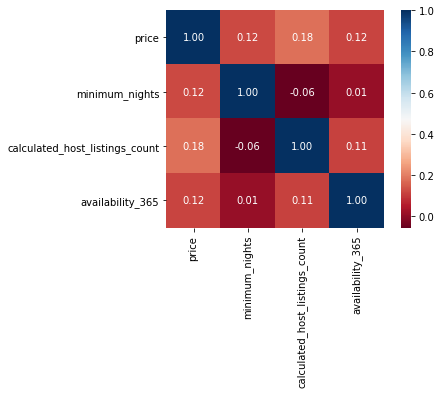

In [262]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Conclusões


Com base nos dados localizados em [Airbnb](http://insideairbnb.com/get-the-data.html) podemos concluir algumas informações relevantes sobre hospedagens em *Florença* na **Itália**.

## `Imóveis disponíveis`  

1. *Entire home/apt* - onde o imóvel fica totalmente disponível ao cliente, com **6885** localidades, cerca de 59,19% do total disponível. 
2. *Private room*  - onde apenas um quarto(de qualquer tipo), fica disponível ao cliente, com **1789** quartos, cerca de 15,38% do total disponível.
3. *Hotel Room* - quartos tradicionais de hotéis, com **167** quartos, cerca de 1,43% do total disponível.
4. *Shared room* - quartos compartilhados, com **24** quartos,cerca de 0,20% do total disponível.

## `Média de noites em Florença`
Em média, quem se hospeda em *Florença* pelo Airbnb, fica 2 noites na cidade.

## `Média de preço de hospedagem em Florença`
Em média, quem se hospeda em *Florença* pelo Airbnb, gasta **$ 75.90** por hospedagem na cidade.

O *Centro Storico* é a localização com maior concentração de imóveis, por ter as maiores atrações da cidade. Por isso tem a maior média de preços da cidade.




